# Names, title, etc

In [102]:
DONT_RUN_LONG_CELLS = True
from pandas import read_csv
kickstarter_filename = '../kickstarter_data_full.csv'
kickstarter_filename_features = '../kickstarter_data_with_features.csv'

ks_data = read_csv(kickstarter_filename)
ks_feat_data = read_csv(kickstarter_filename_features)
data_list = [('ks_data', ks_data), ('ks_feat_data', ks_feat_data)]
# print columns not present in the other dataset
ks_data_columns = set(ks_data.columns)
ks_feat_data_columns = set(ks_feat_data.columns)

ks_data_not_in_feat = ks_data_columns - ks_feat_data_columns
ks_feat_data_not_in_ks = ks_feat_data_columns - ks_data_columns

print(f'Columns in ks_data not in ks_feat_data: {ks_data_not_in_feat}')
print(f'Columns in ks_feat_data not in ks_data: {ks_feat_data_not_in_ks}')

common_columns = ks_data_columns.intersection(ks_feat_data_columns)

# of common columns, compare the values and see if they match
for column in common_columns:
    ks_data_values = ks_data[column].unique()
    ks_feat_data_values = ks_feat_data[column].unique()
    if len(ks_data_values) != len(ks_feat_data_values):
        print(f'Column {column} has different number of unique values: {len(ks_data_values)} vs {len(ks_feat_data_values)}')
    else:
        pass

/var/folders/09/7fcnlqx173v03wyt8sxj1lzh0000gn/T/ipykernel_36010/767449052.py:6: DtypeWarning: Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  ks_data = read_csv(kickstarter_filename)
/var/folders/09/7fcnlqx173v03wyt8sxj1lzh0000gn/T/ipykernel_36010/767449052.py:7: DtypeWarning: Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  ks_feat_data = read_csv(kickstarter_filename_features)


Columns in ks_data not in ks_feat_data: {'USorGB', 'DeadlineWeekend', 'launch_to_state_change_days', 'SuccessfulBool', 'LaunchedTuesday', 'launch_to_deadline_days', 'create_to_launch_days', 'TOPCOUNTRY'}
Columns in ks_feat_data not in ks_data: set()
Column launch_to_state_change has different number of unique values: 7544 vs 2477


## So we know ks_data is the dataset to use as it has more data, more unique data

In [ ]:
data_list = [('ks_data', ks_data), ('ks_feat_data', ks_feat_data)]
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option


def data_info(_data, show_scatter=False):
    print(f'Data head: {_data.head(5)}')
    print(f'Null values: {_data.isnull().sum()}')
    print(f'Data Shape: {_data.shape[0]} rows and {_data.shape[1]} columns')
    print(f'Columns: {list(_data.columns)}')
    for column in _data.columns:
        if len(_data[column].unique()) < 10:
            print(f'{column} unique values: {_data[column].unique()}')
        else:
            percent_unique = len(_data[column].unique()) / _data.shape[0] * 100
            print(f'{column} % unique values: {percent_unique}')
    print(_data.describe())
    _data.hist(figsize=(12, 10))
    plt.tight_layout()
    plt.show()
    plt.figure()  # new plot
    plt.tight_layout()

    # Only show for floats and ints

    float_columns = _data.select_dtypes(include=['float64']).columns
    int_columns = _data.select_dtypes(include=['int64']).columns
    # Combine float and int columns

    numeric_columns = float_columns.append(int_columns)
    # Calculate correlation matrix
    corMat = _data[numeric_columns].corr(method='pearson')

    print(corMat)
    ## plot correlation matrix as a heat map
    plt.figure(figsize=(14, 10))
    sns.heatmap(corMat, square=True)
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)
    plt.title(f"CORRELATION MATRIX USING HEAT MAP")
    plt.show()

    ## scatter plot of all _data
    plt.figure()
    # # The output overlaps itself, resize it to display better (w padding)
    if show_scatter:
        try:
            scatter_matrix(_data)
            plt.tight_layout(pad=0.1)
            plt.show()
        except:
            return


def data_info2(_date):
    set_option('display.max_columns', None)
    if not isinstance(_date, list):
        if not isinstance(_date, tuple):
            _date = ('', _date)
        _date = [_date]
    for name, data in _date:
        print(f'{name} data')
        print(data.info())
        print(data.head(5))
        for column in data.columns:
            highlight_column = 'profile'
            if column == highlight_column:
                # print 2 rows of values completely
                row1 = data.iloc[0][highlight_column]
                row2 = data.iloc[1][highlight_column]
                print(f'Row 1: {row1}')
                print(f'Row 2: {row2}')
            if len(data[column].unique()) < 10:
                print(f'{column} unique values: {data[column].unique()}')
            else:
                percent_unique = len(data[column].unique()) / data.shape[0] * 100
                print(f'{column} % unique values: {percent_unique}')
        break

Data head:    Unnamed: 0          id                                              photo  \
0           0  1454391034  {"small":"https://ksr-ugc.imgix.net/assets/011...   
1           1  1655206086  {"small":"https://ksr-ugc.imgix.net/assets/012...   
2           2   311581827  {"small":"https://ksr-ugc.imgix.net/assets/012...   
3           3   859724515  {"small":"https://ksr-ugc.imgix.net/assets/011...   
4           4  1613604977  {"small":"https://ksr-ugc.imgix.net/assets/012...   

                                                name  \
0  Auntie Di's Music Time Sign ASL for Hearing an...   
1                    Jump Start Kindergarten Toolkit   
2  Ojukwu Balewa Awolowo (O.B.A.) Public Library ...   
3      MASTIZE - [mas-TAHYZ, MAS-tahyz]  - to spread   
4  Synopse der EU-DSGVO - Artikel, Erwägungsgründ...   

                                               blurb      goal  pledged  \
0  MTS ASL Curriculum Workbook is a reproducible ...    1500.0      0.0   
1  This kit teaches h

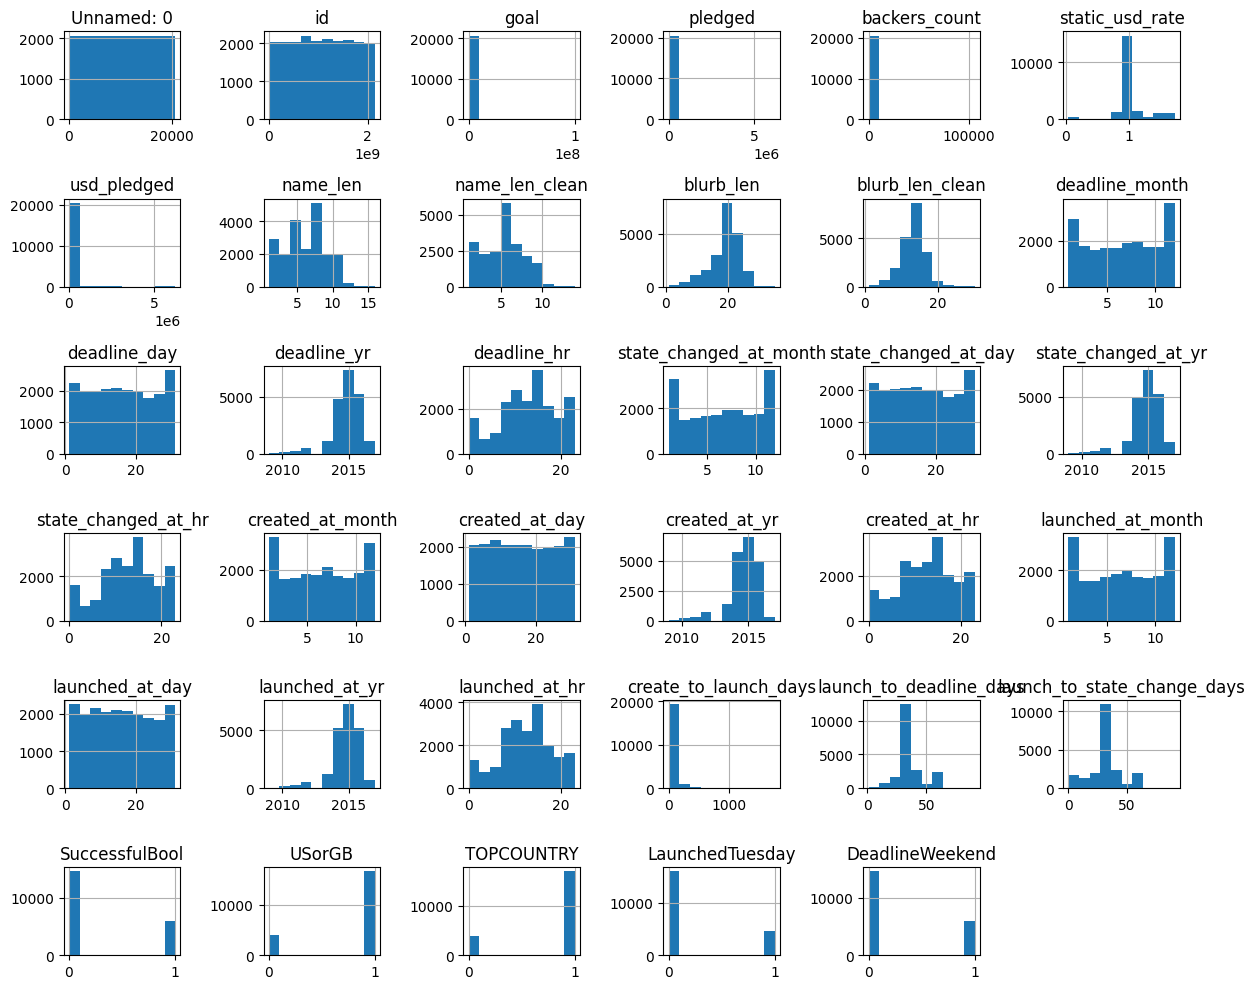

                                 goal   pledged  static_usd_rate  usd_pledged  \
goal                         1.000000  0.010058        -0.032784     0.009606   
pledged                      0.010058  1.000000        -0.047503     0.951005   
static_usd_rate             -0.032784 -0.047503         1.000000    -0.003084   
usd_pledged                  0.009606  0.951005        -0.003084     1.000000   
name_len                    -0.015942  0.085350        -0.001388     0.086470   
name_len_clean              -0.014563  0.090141        -0.015156     0.090229   
blurb_len                   -0.009151 -0.001119         0.042769     0.000770   
blurb_len_clean             -0.008069  0.012587         0.028186     0.014366   
Unnamed: 0                   0.001723  0.047542        -0.094229     0.046125   
id                           0.009464  0.004588        -0.002334     0.002065   
backers_count                0.003838  0.724279        -0.003737     0.758001   
deadline_month              

<Figure size 640x480 with 0 Axes>

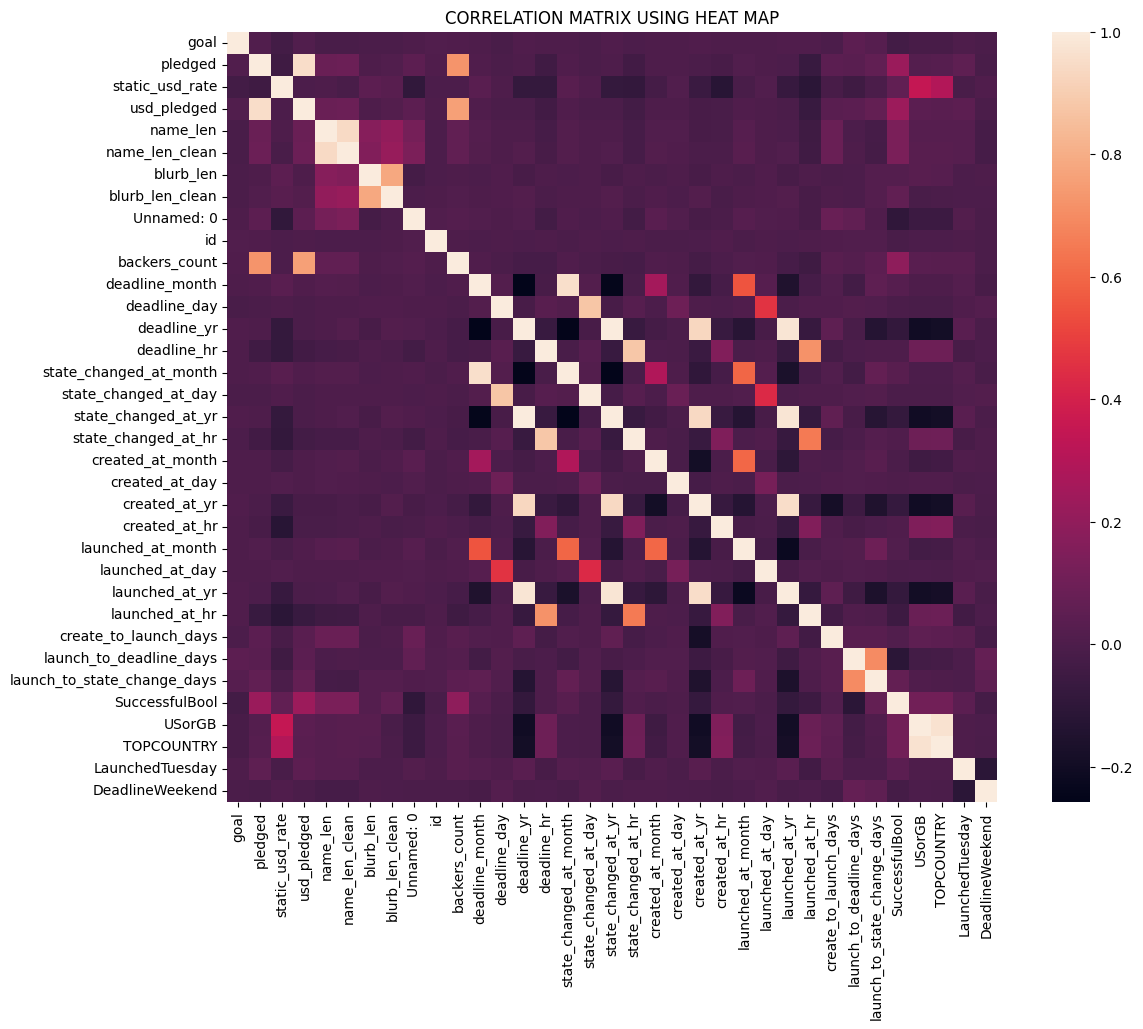

<Figure size 640x480 with 0 Axes>

In [104]:
data_info(ks_data)

## Theres a lot to clean up here. First we need to categorize each column, then determine what we need to change

In [105]:
columns_to_drop = ['Unnamed: 0', 'id', 'photo', 'name', 'blurb', 'slug', 'currency_symbol', 'currency_trailing_code', 'static_usd_rate', 'creator', 'profile', 'friends', 'is_backing', 'permissions', 'name_len', 'blurb_len', 'urls', 'source_url', 'location', 'is_starred', 'create_to_launch']
float_columns = ['goal', 'pledged', 'usd_pledged']
int_columns = ['backers_count', 'name_len_clean', 'blurb_len_clean',  'launch_to_deadline', 'launch_to_state_change', 'create_to_launch_days', 'launch_to_deadline_days', 'launch_to_state_change_days', ]
datetime_columns = ['deadline', 'state_changed_at', 'created_at', 'launched_at']
date_int_columns = ['deadline_month', 'deadline_day', 'deadline_hr', 'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr', 'created_at_month', 'created_at_day', 'created_at_hr', 'launched_at_month', 'launched_at_day', 'launched_at_hr', 'state_changed_at_hr', 'created_at_yr', 'launched_at_yr']
category_columns = ['state', 'currency', 'staff_pick', 'category', 'deadline_weekday', 'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday', 'deadline_yr', 'country']
boolean_columns = ['disable_communication', 'spotlight', 'SuccessfulBool', 'USorGB', 'TOPCOUNTRY', 'LaunchedTuesday', 'DeadlineWeekend']

# This is just to categorize everything and make sure I'm not missing anything
temp_data = ks_data.copy()
data_info2(temp_data)
temp_data = temp_data.drop(columns=columns_to_drop)
temp_data = temp_data.drop(columns=datetime_columns)
temp_data = temp_data.drop(columns=category_columns)
temp_data = temp_data.drop(columns=boolean_columns)
temp_data = temp_data.drop(columns=float_columns)
temp_data = temp_data.drop(columns=int_columns)
temp_data = temp_data.drop(columns=date_int_columns)
print('\n' * 3)
print(f'Lets see what we have left')
data_info2(('temp_data', temp_data))

 data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   20632 non-null  int64  
 1   id                           20632 non-null  int64  
 2   photo                        20632 non-null  object 
 3   name                         20632 non-null  object 
 4   blurb                        20626 non-null  object 
 5   goal                         20632 non-null  float64
 6   pledged                      20632 non-null  float64
 7   state                        20632 non-null  object 
 8   slug                         20632 non-null  object 
 9   disable_communication        20632 non-null  bool   
 10  country                      20632 non-null  object 
 11  currency                     20632 non-null  object 
 12  currency_symbol              20632 non-null  object 
 13  currency_t

In [106]:
kickstarter = ks_data.copy()
#kickstarter = kickstarter.dropna()
kickstarter = kickstarter.drop(columns=columns_to_drop)
# Specifically examine the problematic columns
print("NaN in name_len_clean:", kickstarter['name_len_clean'].isna().sum())
print("NaN in blurb_len_clean:", kickstarter['blurb_len_clean'].isna().sum())

print(kickstarter['category'].unique())
# total number of records
print(kickstarter.shape)
# Number of na's in 'category'
category_nas = kickstarter['category'].isna().sum()
total_rows = kickstarter.shape[0]
print(f'Category has {(category_nas / total_rows * 100):.2f}% as "nan"')
temp_data = ks_data.copy()
# Drop the 10 rows which have _len_clean as nan
kickstarter = kickstarter.dropna(subset=['name_len_clean', 'blurb_len_clean'])
print("NaN in name_len_clean:", kickstarter['name_len_clean'].isna().sum())
print("NaN in blurb_len_clean:", kickstarter['blurb_len_clean'].isna().sum())

kickstarter['name_len_clean'] = kickstarter['name_len_clean'].astype(int)
kickstarter['blurb_len_clean'] = kickstarter['blurb_len_clean'].astype(int)

# Replace 'nan' in category with 'None' (string not object), then do one-hot encoding
kickstarter['category'] = kickstarter['category'].fillna("None")
print(kickstarter['category'].unique())

NaN in name_len_clean: 5
NaN in blurb_len_clean: 5
['Academic' 'Places' nan 'Blues' 'Restaurants' 'Webseries' 'Thrillers'
 'Shorts' 'Web' 'Apps' 'Gadgets' 'Hardware' 'Festivals' 'Plays' 'Musical'
 'Flight' 'Spaces' 'Immersive' 'Experimental' 'Comedy' 'Wearables' 'Sound'
 'Software' 'Robots' 'Makerspaces']
(20632, 47)
Category has 9.16% as "nan"
NaN in name_len_clean: 0
NaN in blurb_len_clean: 0
['Academic' 'Places' 'None' 'Blues' 'Restaurants' 'Webseries' 'Thrillers'
 'Shorts' 'Web' 'Apps' 'Gadgets' 'Hardware' 'Festivals' 'Plays' 'Musical'
 'Flight' 'Spaces' 'Immersive' 'Experimental' 'Comedy' 'Wearables' 'Sound'
 'Software' 'Robots' 'Makerspaces']


In [107]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

def encode_categorical_features(df: pd.DataFrame) -> tuple:
    """Encode all categorical features in the dataframe"""
    # Create a copy to avoid modifying the original
    df = df.copy()

    # Get all categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    print(f"Categorical columns: {categorical_columns}")

    # Handle boolean columns separately
    boolean_columns = ['staff_pick']
    for col in boolean_columns:
        if col in df.columns:
            df[col] = df[col].replace({False: 0, True: 1})
            print(f"Converted boolean column: {col}")

    # Columns to one-hot encode
    columns_to_encode = [
        'category',
        'deadline_weekday',
        'created_at_weekday',
        'launched_at_weekday'
    ]

    # Filter out columns that aren't in the dataframe
    columns_to_encode = [col for col in columns_to_encode if col in df.columns]

    # Remove 'state_changed_at_weekday' column if it exists
    if 'state_changed_at_weekday' in df.columns:
        df = df.drop(columns='state_changed_at_weekday')
        print("Dropped 'state_changed_at_weekday' column")

    # One-hot encode the selected columns
    all_encoded_dfs = []

    for col in columns_to_encode:
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        encoded = encoder.fit_transform(df[[col]])

        # Create meaningful column names
        encoded_cols = [f"{col}_{c}" for c in encoder.categories_[0]]
        encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=df.index)

        # Add to list of encoded dataframes
        all_encoded_dfs.append(encoded_df)

        # Drop the original column
        print(f'Dropping original column: {col}')
        df = df.drop(columns=col)
        print(f"Encoded column: {col} → {len(encoded_cols)} features")

    # Combine all dataframes
    result = pd.concat([df] + all_encoded_dfs, axis=1)

    # Create a list of all categorical columns (original and encoded)
    all_categorical_columns = []
    for col in categorical_columns:
        if col in result.columns:
            all_categorical_columns.append(col)
        else:
            # Add the encoded column names
            all_categorical_columns.extend([c for c in result.columns if c.startswith(f"{col}_")])

    print(f"Total categorical columns after encoding: {len(all_categorical_columns)}")

    return result, all_categorical_columns

# Example usage
kickstarter, category_columns = encode_categorical_features(kickstarter)

Categorical columns: ['state', 'country', 'currency', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'category', 'deadline_weekday', 'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday', 'launch_to_deadline', 'launch_to_state_change']
Converted boolean column: staff_pick
Dropped 'state_changed_at_weekday' column
Dropping original column: category
Encoded column: category → 25 features
Dropping original column: deadline_weekday
Encoded column: deadline_weekday → 7 features
Dropping original column: created_at_weekday
Encoded column: created_at_weekday → 7 features
Dropping original column: launched_at_weekday
Encoded column: launched_at_weekday → 7 features
Total categorical columns after encoding: 55


/var/folders/09/7fcnlqx173v03wyt8sxj1lzh0000gn/T/ipykernel_36010/1974168895.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({False: 0, True: 1})


## Now we know what is in the data, let's look at some of the features and see if we can find any interesting patterns.

In [108]:
# For each feature, lets see a histogram of the values and a boxplot of the values
def plot_feature_distribution(data, feature):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[feature])
    plt.title(f'{feature} Boxplot')
    plt.xlabel(feature)

    plt.tight_layout()
    plt.show()

columns_to_show = float_columns + int_columns

for feature in kickstarter.columns:
    if feature in columns_to_show and not DONT_RUN_LONG_CELLS:
        plot_feature_distribution(kickstarter, feature)

In [109]:
columns_to_standardize = [ # Roughly normal
    'name_len_clean', 'blurb_len_clean',
    'deadline_month', 'deadline_day', 'deadline_hr',
    'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_hr',
    'created_at_month', 'created_at_day', 'created_at_hr',
    'launched_at_month', 'launched_at_day', 'launched_at_hr'
]

columns_to_log_transform = [ # Heavily right skewed
    'goal', 'pledged', 'usd_pledged', 'backers_count',
    'create_to_launch_days'
]

columns_to_normalize = [ # Different scales
    'launch_to_deadline_days', 'launch_to_state_change_days'
]

columns_to_drop2 = [
    # Temporal columns represented by better features
    'deadline', 'state_changed_at', 'created_at', 'launched_at',
    'launch_to_deadline', 'launch_to_state_change',

    # Duplicate/redundant information
    'deadline_yr', 'state_changed_at_yr', 'created_at_yr', 'launched_at_yr',

    # Categorical with many unique values, better represented by other features
    'country', 'currency',

    # Low variance or binary columns that might be redundant
    'disable_communication', 'spotlight',
    'USorGB', 'TOPCOUNTRY', 'LaunchedTuesday', 'DeadlineWeekend'
]

# Drop the columns we don't want
kickstarter = kickstarter.drop(columns=columns_to_drop2)
print(kickstarter.columns)

Index(['goal', 'pledged', 'state', 'staff_pick', 'backers_count',
       'usd_pledged', 'name_len_clean', 'blurb_len_clean', 'deadline_month',
       'deadline_day', 'deadline_hr', 'state_changed_at_month',
       'state_changed_at_day', 'state_changed_at_hr', 'created_at_month',
       'created_at_day', 'created_at_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_hr', 'create_to_launch_days',
       'launch_to_deadline_days', 'launch_to_state_change_days',
       'SuccessfulBool', 'category_Academic', 'category_Apps',
       'category_Blues', 'category_Comedy', 'category_Experimental',
       'category_Festivals', 'category_Flight', 'category_Gadgets',
       'category_Hardware', 'category_Immersive', 'category_Makerspaces',
       'category_Musical', 'category_None', 'category_Places',
       'category_Plays', 'category_Restaurants', 'category_Robots',
       'category_Shorts', 'category_Software', 'category_Sound',
       'category_Spaces', 'category_Thrillers', 'cat

In [110]:
for column in columns_to_log_transform:
    print(f"NaN values in '{column}': {kickstarter[column].isna().sum()}")

print(kickstarter.shape[0])
kickstarter = kickstarter.dropna(subset=columns_to_log_transform)
print(kickstarter.shape[0])

# Standardize the columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for column in columns_to_standardize:
    kickstarter[column] = scaler.fit_transform(kickstarter[[column]])

# Log transform the columns
from sklearn.preprocessing import FunctionTransformer
import numpy as np
log_transformer = FunctionTransformer(np.log1p, validate=True)
for column in columns_to_log_transform:
    kickstarter[column] = log_transformer.fit_transform(kickstarter[[column]])
# Normalize the columns
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
for column in columns_to_normalize:
    kickstarter[column] = normalizer.fit_transform(kickstarter[[column]])

NaN values in 'goal': 0
NaN values in 'pledged': 0
NaN values in 'usd_pledged': 0
NaN values in 'backers_count': 0
NaN values in 'create_to_launch_days': 0
20627
20627


Data head:         goal   pledged   state  staff_pick  backers_count  usd_pledged  \
0   7.313887  0.000000  failed           0       0.000000     0.000000   
1   6.216606  0.000000  failed           0       0.000000     0.000000   
2  11.512935  4.795791  failed           0       1.791759     4.795791   
3   8.517393  0.000000  failed           0       0.000000     0.000000   
4   8.078068  5.877736  failed           0       2.890372     5.985955   

   name_len_clean  blurb_len_clean  deadline_month  deadline_day  deadline_hr  \
0        1.533190         0.888937       -1.673159      0.809246    -0.484799   
1       -0.534541         0.584381       -0.500549     -1.627734     0.509215   
2        1.119644        -0.938399       -1.086854      1.141561    -0.816137   
3        0.292552        -0.024731        0.965213     -1.073875    -2.141490   
4        0.706098         1.498049       -0.207397      1.252333    -0.153461   

   state_changed_at_month  state_changed_at_day  state_ch

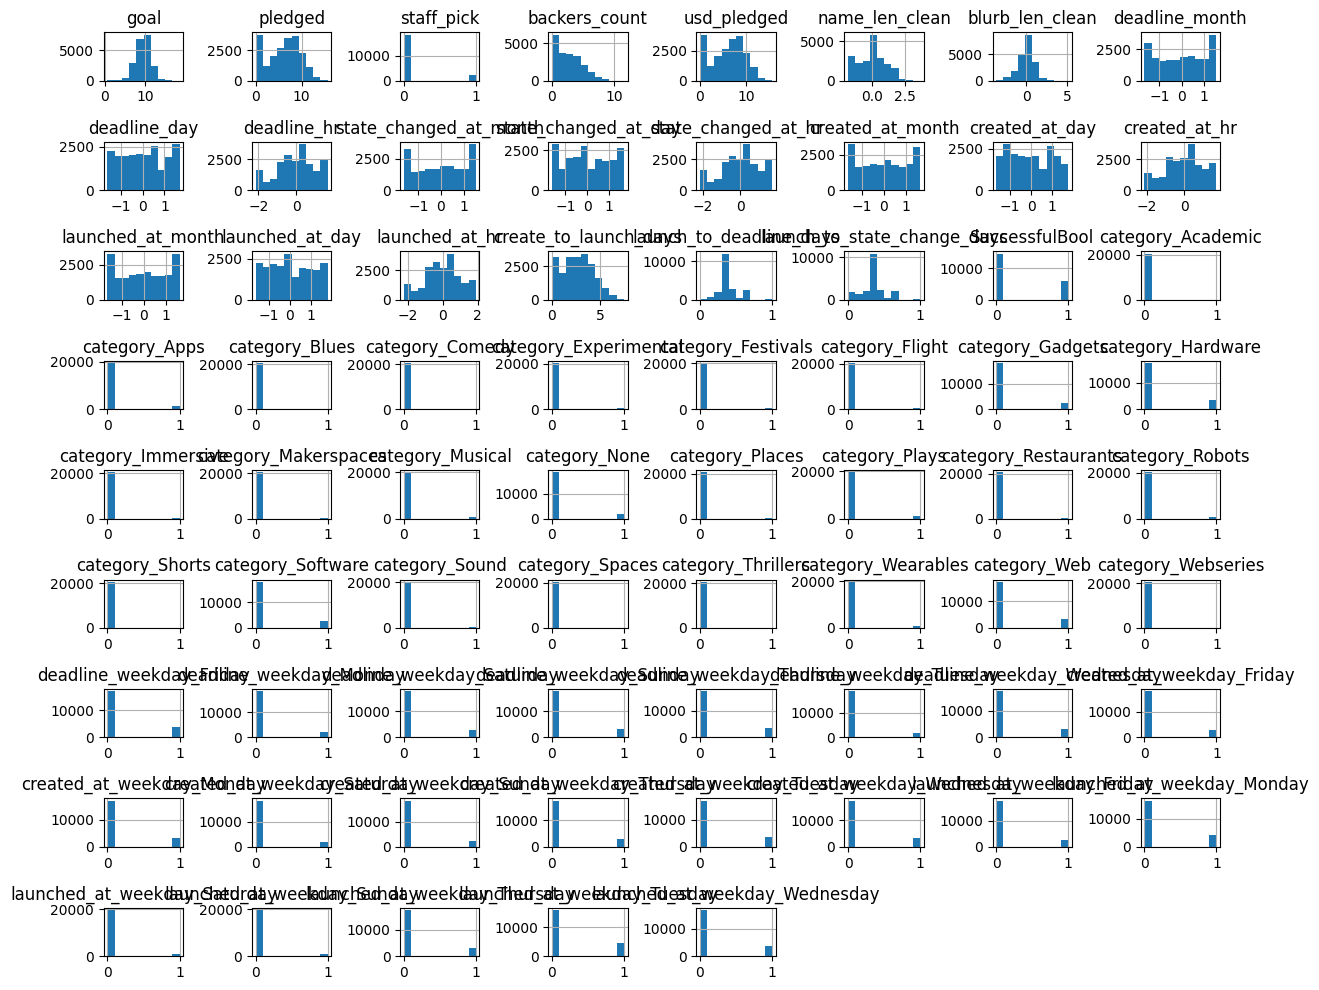

                                   goal   pledged  backers_count  usd_pledged  \
goal                           1.000000  0.124508       0.086695     0.110135   
pledged                        0.124508  1.000000       0.923833     0.996626   
backers_count                  0.086695  0.923833       1.000000     0.926659   
usd_pledged                    0.110135  0.996626       0.926659     1.000000   
name_len_clean                 0.067497  0.293642       0.279944     0.293808   
...                                 ...       ...            ...          ...   
launched_at_weekday_Thursday   0.001326 -0.015169      -0.015243    -0.014968   
launched_at_weekday_Tuesday    0.018767  0.060892       0.071345     0.060832   
launched_at_weekday_Wednesday  0.025505  0.010997       0.011825     0.011076   
staff_pick                     0.084536  0.385184       0.449192     0.387127   
SuccessfulBool                -0.258953  0.585964       0.653987     0.590969   

                           

<Figure size 640x480 with 0 Axes>

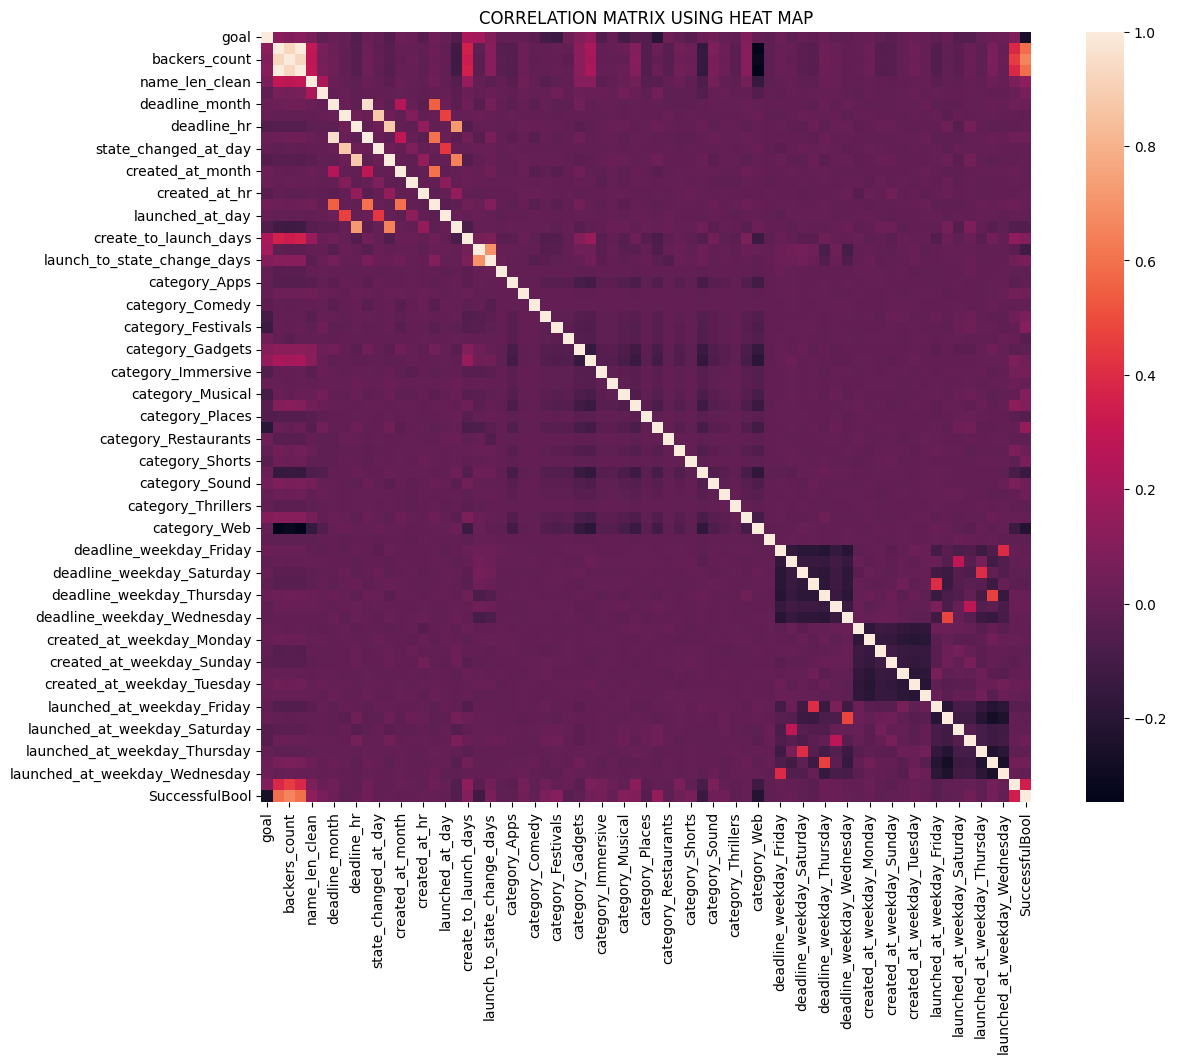

<Figure size 640x480 with 0 Axes>

In [111]:

# Check the data again
data_info(kickstarter)

## We need to make a 'success' classifier, so lets take a look at the definition of success in the data

In [112]:
# Compare 'state' and 'SuccessfulBool' to see if they are the same
print(ks_data['state'].unique())
print(ks_data['SuccessfulBool'].unique())
print(ks_data['state'].value_counts())
print(ks_data['SuccessfulBool'].value_counts())
# Make a table where the rows are 0/1 for SuccessfulBool and the columns are the states
print(ks_data.groupby(['SuccessfulBool', 'state']).size().unstack())

# Show the distribution of 'pledged/goal' to see if we can make a column called 'got_funded'
temp_data = ks_data.copy()

# confirm they're both numbers
print(temp_data['pledged'].dtype)
print(temp_data['goal'].dtype)

# show the count where pledged > goal
print(f'{temp_data[temp_data['pledged'] > temp_data['goal']].shape[0]} projects got funded')

# Create got_funded column and show the histogram
temp_data['got_funded'] = temp_data['pledged'] / temp_data['goal']

# Describe the column
print(temp_data['got_funded'].describe())

# Get count of SuccessfulBool
print(temp_data['SuccessfulBool'].value_counts())
# Shows the same thing

['failed' 'canceled' 'successful' 'live' 'suspended']
[0 1]
state
failed        11416
successful     6018
canceled       2460
live            508
suspended       230
Name: count, dtype: int64
SuccessfulBool
0    14614
1     6018
Name: count, dtype: int64
state           canceled   failed   live  successful  suspended
SuccessfulBool                                                 
0                 2460.0  11416.0  508.0         NaN      230.0
1                    NaN      NaN    NaN      6018.0        NaN
float64
float64
6009 projects got funded
count    20632.000000
mean         3.232088
std        177.318223
min          0.000000
25%          0.001500
50%          0.065439
75%          1.030000
max      22603.000000
Name: got_funded, dtype: float64
SuccessfulBool
0    14614
1     6018
Name: count, dtype: int64


# So SuccessfulBool doesn't capture why it failed but does capture if it was successful and closely matches if the project was funded, but not how much it was funded.

In [113]:
# using kickstarter data, show some good plots of features vs SuccessfulBool

def plot_feature_vs_success(data, feature):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[data['SuccessfulBool'] == 1][feature], bins=30, kde=True, color='green', label='Successful')
    sns.histplot(data[data['SuccessfulBool'] == 0][feature], bins=30, kde=True, color='red', label='Failed')
    plt.title(f'{feature} vs SuccessfulBool')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data['SuccessfulBool'], y=data[feature])
    plt.title(f'{feature} vs SuccessfulBool')
    plt.xlabel('SuccessfulBool')
    plt.ylabel(feature)

    plt.tight_layout()
    plt.show()

# Show the features that are not categorical
for feature in kickstarter.columns:
    if DONT_RUN_LONG_CELLS:
        break
    if feature not in ['state', 'SuccessfulBool', 'category', 'currency', 'staff_pick']:
        plot_feature_vs_success(kickstarter, feature)

### Because `state` captures the same information as `SuccessfulBool`, we can drop it
### and because `got_funded` and `pledged` offer information obtained at the end of the campaign, we should drop them as well

In [114]:
kickstarter = kickstarter.drop(columns=['state', 'pledged'])

['Academic' 'Places' 'Blues' 'Restaurants' 'Webseries' 'Thrillers'
 'Shorts' 'Web' 'Apps' 'Gadgets' 'Hardware' 'Festivals' 'Plays' 'Musical'
 'Flight' 'Spaces' 'Immersive' 'Experimental' 'Comedy' 'Wearables' 'Sound'
 'Software' 'Robots' 'Makerspaces' 'None']
{np.str_('Academic'): np.float64(19765.1), np.str_('Places'): np.float64(9515.37), np.str_('Blues'): np.float64(18308.75), np.str_('Restaurants'): np.float64(167050.0), np.str_('Webseries'): np.float64(16129.85), np.str_('Thrillers'): np.float64(18443.0), np.str_('Shorts'): np.float64(4193.625), np.str_('Web'): np.float64(112754.3422556391), np.str_('Apps'): np.float64(46684.48544520548), np.str_('Gadgets'): np.float64(61371.38698630137), np.str_('Hardware'): np.float64(100855.87154864531), np.str_('Festivals'): np.float64(30708.045643153528), np.str_('Plays'): np.float64(11901.118243243243), np.str_('Musical'): np.float64(53243.854614412136), np.str_('Flight'): np.float64(145224.99195710456), np.str_('Spaces'): np.float64(289687.7

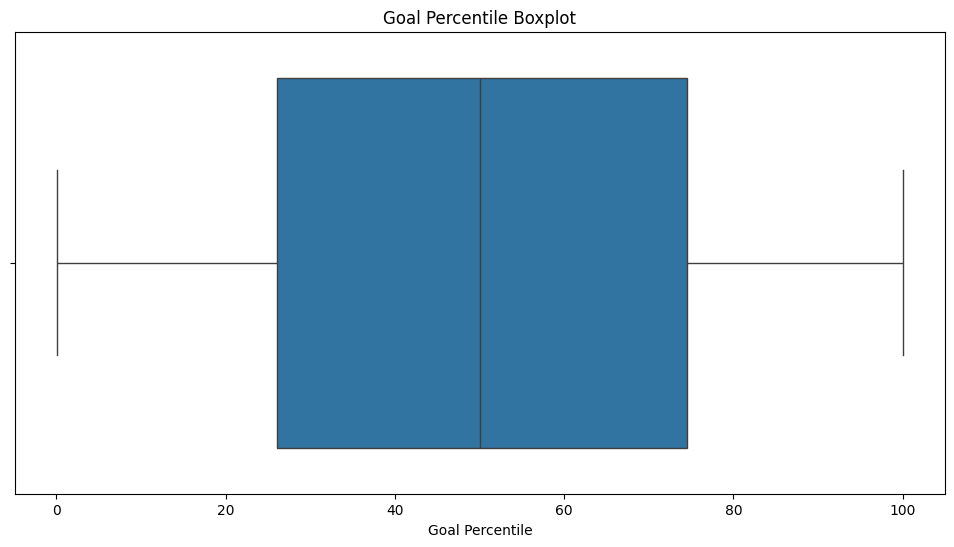

In [115]:
# Determine the avg goal for each category, save to a hashmap
category_goals = {}

temp_data = ks_data.copy()
unique_categories = ks_data['category'].unique()
unique_categories = np.delete(unique_categories, 2)
unique_categories_list = unique_categories.tolist()
unique_categories_list.append('None')
unique_categories = np.array(unique_categories_list)

print(unique_categories)

for category in unique_categories:
    # get the avg goal for the category
    avg_goal = ks_data[ks_data['category'] == category]['goal'].mean()
    # store as regular string and regular float
    category_goals[category] = avg_goal

print(category_goals)

# Now make a new column, goal_percentile
def make_percentile(goal_amount: float, category: str) -> float:
    """Return what percentile the goal is compared to average for its category"""
    avg_for_category = category_goals.get(category, 0)
    if avg_for_category == 0:
        return 0

    return goal_amount / avg_for_category * 100

# Then apply the function to create a new column
kickstarter['goal_percentile'] = ks_data.groupby('category')['goal'].transform(
    lambda x: x.rank(pct=True)
) * 100  # Scale to 0-100

# Show the distribution of goal_percentile as a box plot
def plot_goal_percentile_boxplot(data):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=data['goal_percentile'])
    plt.title('Goal Percentile Boxplot')
    plt.xlabel('Goal Percentile')
    plt.show()

plot_goal_percentile_boxplot(kickstarter)

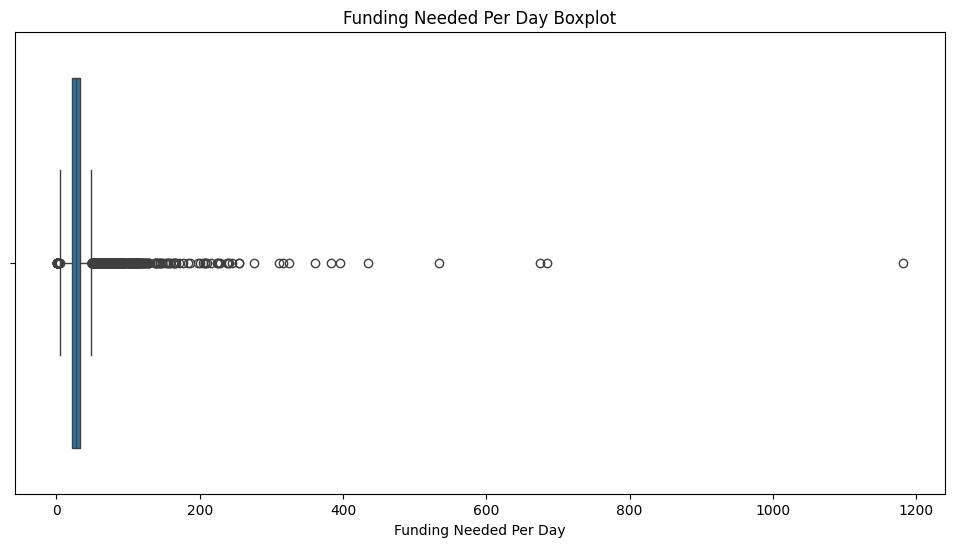

Infinities in funding_needed_per_day: 0
NaNs in funding_needed_per_day: 0
Max value in funding_needed_per_day: 1181.0128839662095
Zeros in launch_to_deadline_days: 0


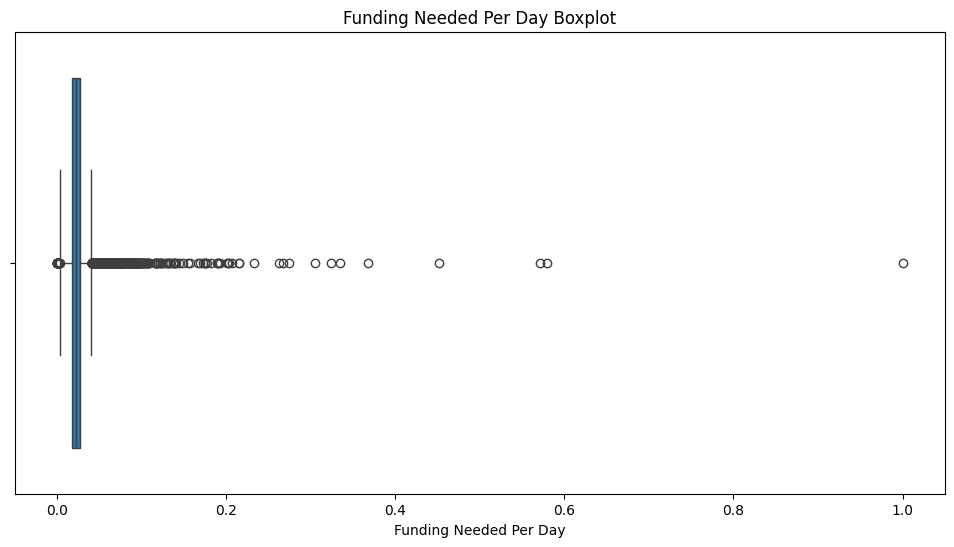

In [116]:
# make a new column funding_needed_per_day which is the goal / launch_to_deadline

# Drop all rows with launch_to_deadline_days = 0
kickstarter = kickstarter[kickstarter['launch_to_deadline_days'] != 0]

kickstarter['funding_needed_per_day'] = kickstarter['goal'] / kickstarter['launch_to_deadline_days']
# show the distribution of funding_needed_per_day
def plot_funding_needed_per_day_boxplot(data):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=data['funding_needed_per_day'])
    plt.title('Funding Needed Per Day Boxplot')
    plt.xlabel('Funding Needed Per Day')
    plt.show()

plot_funding_needed_per_day_boxplot(kickstarter)
import numpy as np

# 1. Check where the infinities or extreme values are
print("Infinities in funding_needed_per_day:", np.isinf(kickstarter['funding_needed_per_day']).sum())
print("NaNs in funding_needed_per_day:", np.isnan(kickstarter['funding_needed_per_day']).sum())
print("Max value in funding_needed_per_day:", kickstarter['funding_needed_per_day'].max())

# 2. Check the source columns - likely a division by zero
print("Zeros in launch_to_deadline_days:", (kickstarter['launch_to_deadline_days'] == 0).sum())
# Normalize it
kickstarter['funding_needed_per_day'] = normalizer.fit_transform(kickstarter[['funding_needed_per_day']])

plot_funding_needed_per_day_boxplot(kickstarter)


In [117]:
print(kickstarter.columns)

Index(['goal', 'staff_pick', 'backers_count', 'usd_pledged', 'name_len_clean',
       'blurb_len_clean', 'deadline_month', 'deadline_day', 'deadline_hr',
       'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_hr',
       'created_at_month', 'created_at_day', 'created_at_hr',
       'launched_at_month', 'launched_at_day', 'launched_at_hr',
       'create_to_launch_days', 'launch_to_deadline_days',
       'launch_to_state_change_days', 'SuccessfulBool', 'category_Academic',
       'category_Apps', 'category_Blues', 'category_Comedy',
       'category_Experimental', 'category_Festivals', 'category_Flight',
       'category_Gadgets', 'category_Hardware', 'category_Immersive',
       'category_Makerspaces', 'category_Musical', 'category_None',
       'category_Places', 'category_Plays', 'category_Restaurants',
       'category_Robots', 'category_Shorts', 'category_Software',
       'category_Sound', 'category_Spaces', 'category_Thrillers',
       'category_Wearables', 'c